# Numerical Computing - Numpy Arrays

# Table of contents

[Executive Summary](#summary)


### **Resources**: 

- [_Python for Finance (2nd ed.)_](http://shop.oreilly.com/product/0636920117728.do): Sec. 4.Numpy Arrays, 4.Basic Vectorization
- _[Numpy Quickstart Tutorial - The Basics](https://docs.scipy.org/doc/numpy/user/quickstart.html#the-basics)_ (An Example; Array Creation; Printing Arrays; Basic Operations; Universal Functions; Indexing, Slicing and Iterating), _[Numpy Quickstart Tutorial - Shape Manipulation](https://docs.scipy.org/doc/numpy/user/quickstart.html#shape-manipulation)_ (Changing the shape of an array; Stacking together different arrays).

# Executive Summary <a name="summary"></a>

**TODO**

The following sections are organized as follows: 
- ...

# 1. Introduction: from Lists to Arrays <a name="intro"></a>

We'll keep this discussion as intuitive as possible and as informal as possible too.
The concept of _array_ belongs to two knowledge domains (at least):

- **Mathematics**: an array is a sequence of numbers of the same type (Naturals, Rationals, Reals,...). It can be:

    - a 1-dimensional vector $v$. That is, the sequence of elements indexed by the one integer $i$;
    - a 2-dimensional matrix $M$. That is, the sequence of elements indexed by the couple of integers $(i,j)$;
    - a N>2-dimensional tensor $T$. That is, the sequence of elements indexed by n-tuple of n integers $(i_1, \cdots, i_n)$. (*)
    
(*) Feel lost? Ok, no problem. Let's make an example with a 3-dimensional Tensor. So, if $N=3$, a 3-dimensional sequence of numbers can be visualized as a  _cube_ of numbers indexed by the 3 indexes $(i,j,k)$ where indexes $i$ and $j$ run along _height_ (rows axes) and _width_ (columns axes) of the cube, respectively. While index $k$ runs along the depth (say the _pages_ axes) of the cube. Therefore, each page is distinguished by the value of index $k=0,1,2,...$, whereas numbers on the same page differ by the values of $(i,j)$ indexes (yes, you can think each page as a matrix of numbers). For example, the $\color{red}{\text{red 1}}$ in the front page has indexes $(i,j,k) = (3,2,0)$, wherease the three $\color{green}{\text{green 2}}$ on the bottom right corner have share same $i=4$ and $j=4$ indexes and differ by the value of $k=0$ (front-page), $k=1$ (second page) and $k=2$ (back page). See picture. 

<img src="../images/tensor3d.png" width="500">

- **Informatics**: an array is a sequence of data of the same data-type. The fact that all data stored in an array are of the same data-type is important because it allows to allocate the same amount of memory (bits) for each item in the array. Moreover, being a _sequence,_ translates into the fact that consecutive items are stored in consecutive portions of memory, which are thus easily to be indexed and therefore quicker to be accessed. 


We have already seen a great example of sequence-like data-structure in basic Python: the `list`. In particular Lists feature the following key facts:

**a**: _Lists are sequences._ Therefore, consecutive elements of the lists can be allocated in consecutive slots of memory.

**b**: _Lists can store simultaneously data of heterogeneous data-type._ Therefore, it's not known _a priori_ whether we can reserve the same amount of memory to each element of the list.

**c**: _Lists are mutable (e.g. think to `.append()` method)._ Therefore, the totale amount of memory to be reserved for the allocation of the whole list is not known _a priori_ or, at most, is not fixed.

Points **b** and **c**, though they make lists very flexible, they also represent bottlenecks in terms of memory usage and performance. Lists are somehow too _general_ to be excell excel in performance too. 

There is the need of a more _specialized_ data-structure, sharing with lists the sequentiality of data, but compromising on some flexibility in the name of performance. That's why we have [NumPy](https://docs.scipy.org/doc/numpy/user/quickstart.html#quickstart-tutorial) and its data-structure `numpy.ndarray` has been created.

Key-facts of Numpy's arrays:

**a**: arrays extend the sequentiality of lists, introducing a built-in notion of dimensions (called _axes_ );

**b**: array's length ( _size_ ) is constrained to be immutable;

**c**: array's items are constrained to have the same data-type;

The built-in notion of dimensions allows to easily map the mathematical concepts of vectors, matrices and N-dimensional tensors into 1-dim, 2-dim and N-dim Numpy's arrays, respectively. Moreover, the constraints on array size ( **b** ) and same data-type **c** allow several speed improvements and _vectorization_ of code. That is, those allow to have fast(er) memory access and to write functions that work on all the elements of an array "at once".  

## 1.1. `numpy.ndarray` $\mu \epsilon \tau \alpha$-informations <a name="meta_info"></a>

These key-facts translates into the following meta-informations that can be accessed as [attributes of any array](https://docs.scipy.org/doc/numpy/user/quickstart.html#the-basics):

Attribute | Meaning | Constraints (if any)
:---: | :---: | :---:
`.ndim`  | The number of axes (dimensions) of an array: 1 for a vector, 2 for a matrix.... | -  |
`.shape` | The dimensions of the array: a Tuple `(n,m)` for a matrix of `n` rows and `m` cols| -  |
`.size` | The number of elements of the array: `n` $\times$ `m` for a matrix of shape `(n,m)` | fixed (*)  |
`.dtype` | The data-type of array's elements | fixed for all elements  |

We'll use these attributes to explore arrays that we'll introduce.

(*) the `.resize()` method allows to actually re-size an array, but creating a new array. See section [2.4.3. Changing the size: `.resize()`](#reshape).


The function `type()` returns `numpy.ndarray` for NumPy's arrays. 

As preliminary import we import `numpy` modulus and give to it the `np` alias

In [1]:
import numpy as np

Now we have access to all the contents of NumPy module. Let's start!

# 2. 1-dim arrays <a name="1_dim"></a>

We start with one-dimensional arrays (i.e. vectors). That is, a sequence of elements (usually numbers), all of the same data-type. As said, in NumPy, dimensions are called _axes_ and 1-dim arrays have 1 dimension.

## 1.1. Array Creation <a name="creation_1d"></a>

Array can be created:
- from Lists or Tuples;
- from sequences of numbers;
- using placeholder functions.

### 1.1.1. From Lists or Tuples  <a name="from_lists"></a>

We define a list of the first 0,...,9 integers squared

In [2]:
lis = [i**2 for i in range(10)]
lis

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [3]:
type(lis)

list

and we can define a 1-dim array `vec` accordingly

In [4]:
vec = np.array(lis)
vec

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [82]:
type(vec)

numpy.ndarray

Notice that I defined separately the list `lis` just for clarity. The above definition is equivalent to

In [6]:
vec = np.array([i**2 for i in range(10)])
vec

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

Let's take a look at `vec` meta-informations:

`vec` is 1-dimensional:

In [7]:
vec.ndim

1

altough not very significant in the 1-dim case, let's take a look at its shape: it has all the 10 values arranged along its unique dimension 

In [8]:
vec.shape

(10,)

The number of elements:

In [9]:
vec.size

10

observe that in the 1-dim case, you can retrieve the number of elements also using the `len()` function...

In [10]:
len(vec)

10

...but we'll see this is not the case in the N-dimensional case, so please use `vec.size` if you want to know how many numbers your array holds. 

Finally, having defined our vector as the array of the first 10 integers squared, it is created with elements of integer data-type and its `.dtype` is inferred accordingly

In [11]:
vec.dtype

dtype('int32')

Don't be scared by the fact that what is returned is `dtype('int32')` and not simply `int`, it's just that NumPy that has chosen to have it's own data-types. Anyway, you can read `dtype('int32')` as `int` peacefully.

Notice, that we could also have chosen explicitly to define our array as an array of Floats, instead of integers, using the `dtype` parameter of `np.array()` function

In [12]:
vec_float = np.array(lis, dtype='float')
vec_float

array([ 0.,  1.,  4.,  9., 16., 25., 36., 49., 64., 81.])

In [13]:
vec_float.dtype

dtype('float64')

and as you can see `vec_float` is the same of `vec` but its elements are all casted as decimal numbers and its data-type is then `dtype('float64')` (NumPy's version for `float`).

A possible _signature_ for the creational function `np.array()` would be 

`np.array(sequence[, dtype])` 

where `sequence` could be a list and `dtype` - if not provided - is inferred by the data-type of `sequence`'s elements, as we have just seen. The syntax `[, optionalArgument]` is conventional. Get familiar with it. 

#### What if we mix data-types? <a name="mixing_types"></a>

Recall that all the elements of a NumPy's array must share the same data-type, therefore if we mix (intentionally or unintentionally) types, it's `np.array` internals that take care of the required homogeneization of elements data-types. It's of course your duty to be aware of it.

We can distinguish a couple of relevant cases:

- `int` and `float`: NumPy promotes integers to floats and define the array as float `dtype`

In [14]:
lis = [1, 2.5, 5, 6, 7.5]
print("lis: ", lis)

vec = np.array(lis)
print("dtype: ", vec.dtype)
vec

lis:  [1, 2.5, 5, 6, 7.5]
dtype:  float64


array([1. , 2.5, 5. , 6. , 7.5])

- numbers and `str`: NumPy casts all the numbers as Strings and define the array as Unicode-encoded characters `dtype` (the `U` stands for Unicode), that is an array of string-like characters.

In [15]:
lis = [1, 2.5, "EUR"]
print("lis: ", lis)

vec = np.array(lis)
print("dtype: ", vec.dtype)
vec

lis:  [1, 2.5, 'EUR']
dtype:  <U32


array(['1', '2.5', 'EUR'], dtype='<U32')

Again, in these examples, lists are separately defined just for clarity. You could equivalently do:

In [16]:
vec = np.array(lis)
print("dtype: ", vec.dtype)
vec

dtype:  <U32


array(['1', '2.5', 'EUR'], dtype='<U32')

**Take-home message**: do not mix data-types in `np.array()` (unless you have a strong reason to do it).

### 1.1.2. From sequences of numbers: `np.arange()`  <a name="arange_linspace"></a>

If you want to create an array from a sequence of numbers, you can use 

`np.arange([start,] stop[, step])` 

which creates a 1-dim array of numbers from `start` to `stop-1`, each `step` numbers.

As suggested by the use of `[]` conventional syntax in `arange`'s signature, the parameters `start` and `step` are optional and - if not specified - default values are `start=0` and `step=1`.

In [17]:
vec = np.arange(10)
vec

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

which is equal to

In [18]:
vec = np.arange(0,11,1)

In general we can write

In [19]:
vec = np.arange(1, 7, 0.25)
vec

array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
       3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75, 6.  , 6.25,
       6.5 , 6.75])

When working with floating point values, the finite-precision may cause impredictability of the number of elements returned by `np.arange()`. Therefore, where the size is something we want to control for, it's better to use

`np.linspace([start,] stop[, num])` 

which returns a 1-dimensional array of `num` numbers from `start`(included) to `stop` included 

In [127]:
np.linspace(0,3,30)

array([0.        , 0.10344828, 0.20689655, 0.31034483, 0.4137931 ,
       0.51724138, 0.62068966, 0.72413793, 0.82758621, 0.93103448,
       1.03448276, 1.13793103, 1.24137931, 1.34482759, 1.44827586,
       1.55172414, 1.65517241, 1.75862069, 1.86206897, 1.96551724,
       2.06896552, 2.17241379, 2.27586207, 2.37931034, 2.48275862,
       2.5862069 , 2.68965517, 2.79310345, 2.89655172, 3.        ])

This is typically used when one wants to evaluate a function at a lot of points

In [134]:
from math import pi # importing pi constant

x = np.linspace(0,2*pi,1000)
y = np.sin(x) # this is another example of universal function, see later dedicated section

let's plot it

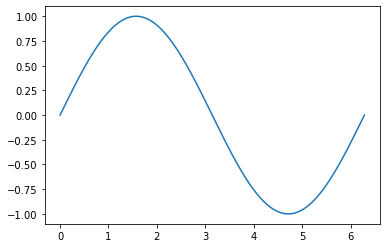

In [133]:
import matplotlib.pylab as plt

plt.plot(x,y)
plt.show()

### 1.1.3. Using placeholder content: `np.zeros()`, `np.ones()`, `np.empty()`  <a name="arange_linspace"></a>

When you know how long your vector should be but you don't know which values to input in advance, you can use one of these initialized functions:

- `np.ones(shape[, dtype])`: creates an array of ones;
- `np.zeros(shape[, dtype])`: creates an array of zeros;
- `np.empty(shape[, dtype])`: creates an empty array, where the actual values depend on the state of memory.

In each of these, 

- `dtype` is optional and, default set to `float64` (NumPy's ``float` type);
- `shape`, in the 1-dim case, is an `int` number representing the number of values the vector will holds.

These functions are used in their full generality in the multi-dimensional case. We'll see this later.

In [20]:
vec = np.ones(10)
print("dtype: ", vec.dtype)
vec

dtype:  float64


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [21]:
vec = np.ones(10, dtype="int")
print("dtype: ", vec.dtype)
vec

dtype:  int32


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
vec = np.zeros(10)
print("dtype: ", vec.dtype)
vec

dtype:  float64


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
vec = np.zeros(10, dtype="int")
print("dtype: ", vec.dtype)
vec

dtype:  int32


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
vec = np.empty(10)
print("dtype: ", vec.dtype)
vec

dtype:  float64


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

these values filled by `.empty()` could have been whatever depending on the current state of the memory

## 1.2. Indexing, Slicing, Assigning and Iterating <a name="index_slice_iter_1d"></a>

One-dimensional arrays can be _zero-based_ indexed, sliced and iterated over, much like lists and other Python sequences.

### 1.2.1. Indexing <a name="ind_1d"></a>

Let's re-define our `vec` friend

In [25]:
vec = np.array([i**2 for i in range(10)])
vec

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

The one-dimensional array `vec` can be indexed as

`vec[i]`

where `i` is the index of the $(i+1)$-th element of ``vec`. Notice that:

- positive indexing starts from `i == 0` up to `i == len(vec) - 1`
- negative indexing starts from `i == -1` down to `i == -len(vec)`

In [26]:
# 0 is the index of the first element of the array (positive indexing)
print(vec[0])
type(vec[0])

0


numpy.int32

In [27]:
# len(vec) -1 is the index of the last element of the array (positive indexing)
print(vec[len(vec) - 1])

81


In [28]:
# -1 is the index of the last element of the array (negative indexing)
print(vec[-1])

81


In [29]:
# -len(vec) is the index of the last element of the array (negative indexing)
print(vec[-len(vec)])

0


### 1.2.2. Slicing <a name="slice_1d"></a>

The one-dimensional array `vec` can be sliced as

`vec[i:j:k]`

where:

- `i` is the starting index (included) of the slice. It is optional: if not provided is set to `i == 0` (slice from the start)
- `j` is the starting index (excluded) of the slice, It is optional: if not provided is set to `j == len(vec)` (slice to the end)
- `k` is the step of the slice. It is optional: if not provided is set to `k == 1` (each element). If negative, reads the array from the last element.

That is, `vec[i:j:k]` slice `vec` from `vec[i]` to `vec[j-1]`, each `k` elements.

The role of the `:` (colon) is that of range selector. Here is the full range `vec[:]`

In [30]:
vec[:] # equivalent to simply vec

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [31]:
vec_slice = vec[0:2] # elements from position 0 (included) to 2 (excluded)
vec_slice

array([0, 1])

In [32]:
vec[2:5] # elements from position 2 (included) to 5 (excluded)

array([ 4,  9, 16])

In [33]:
vec[:2]   # elements from the beginning to position 2 (excluded) --- equivalent to vec[0:2]

array([0, 1])

In [34]:
vec[-2:]  # elements from the second-last (included) to the end

array([64, 81])

The role of the step:

In [35]:
vec[1:7:2] # from position 1 (included) to 7 (excluded), each 2 elements

array([ 1,  9, 25])

In [36]:
vec[::2] # from the beginning to the end of vec, each 2 elements

array([ 0,  4, 16, 36, 64])

and this is how to revert the vector:

In [37]:
vec

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [38]:
vec[::-1] # literally from the beginning to the end of vec, each element starting from the last one

array([81, 64, 49, 36, 25, 16,  9,  4,  1,  0])

### 1.2.3. Assigning new values <a name="assign_1d"></a>

In [39]:
vec

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

To change a single value:

In [40]:
vec[2]

4

In [41]:
vec[2] = -17
vec

array([  0,   1, -17,   9,  16,  25,  36,  49,  64,  81])

To change a whole slice:

In [42]:
vec[4:7] 

array([16, 25, 36])

In [43]:
vec[4:7] = 1000
vec

array([   0,    1,  -17,    9, 1000, 1000, 1000,   49,   64,   81])

### 1.2.4. Iterating over arrays <a name="iter_1d"></a>

Iteration happen as in Python lists:

- over the array;
- counter-based (using `np.arange`)
- using the `enumerate()` function

let's quickly review the three methods

In [69]:
vec

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

Iteration over the array: no access to the indexes

In [71]:
from math import sqrt

for square in vec:
    print(sqrt(square))

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


Counter-based iteration using `np.arange()`:

In [73]:
for i in np.arange(len(vec)):
    print(vec[i])

0
1
4
9
16
25
36
49
64
81


Enumeration of indexes and values using `enumerate()`: access to both indexes and values

In [75]:
for i, vec_i in enumerate(vec):
    print("i = {}, vec_i = {}".format(i, vec_i)) # vec_i is equivalent to vec[i]

i = 0, vec_i = 0
i = 1, vec_i = 1
i = 2, vec_i = 4
i = 3, vec_i = 9
i = 4, vec_i = 16
i = 5, vec_i = 25
i = 6, vec_i = 36
i = 7, vec_i = 49
i = 8, vec_i = 64
i = 9, vec_i = 81


## 1.3. Basic operations (are _element-wise_ ) <a name="indexing_slicing_iterating"></a>

Basic array operations are computed element-wise. We can distinguish a couple of relevant cases:

In [44]:
vec = np.array([i**2 for i in range(10)])
vec

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

- array `+` number: number is added to each element of array (same for `-`, `*`, `/`, `**` operators)

In [45]:
vec + 100 # equivalent to 100 + vec

array([100, 101, 104, 109, 116, 125, 136, 149, 164, 181])

In [46]:
vec - 1

array([-1,  0,  3,  8, 15, 24, 35, 48, 63, 80])

In [47]:
vec * 2 # equivalent to 2 * vec

array([  0,   2,   8,  18,  32,  50,  72,  98, 128, 162])

In [48]:
vec_new = vec / 3 # note the casting to float
print("dtype: ", vec_new.dtype)
vec_new

dtype:  float64


array([ 0.        ,  0.33333333,  1.33333333,  3.        ,  5.33333333,
        8.33333333, 12.        , 16.33333333, 21.33333333, 27.        ])

In [49]:
vec ** 2

array([   0,    1,   16,   81,  256,  625, 1296, 2401, 4096, 6561],
      dtype=int32)

- array `+` array: elements are added element-wise (same for `-`, `*`, `/` operators)

In [50]:
vec_rev = vec[::-1]
vec_rev

array([81, 64, 49, 36, 25, 16,  9,  4,  1,  0])

In [51]:
vec + vec_rev # equivalent to vec_rev + vec

array([81, 65, 53, 45, 41, 41, 45, 53, 65, 81])

In [52]:
vec - vec_rev

array([-81, -63, -45, -27,  -9,   9,  27,  45,  63,  81])

In [53]:
vec * vec_rev # equivalent to vec_rev * vec

array([  0,  64, 196, 324, 400, 400, 324, 196,  64,   0])

In [54]:
vec / vec_rev  # notice the 'inf' and the warning when we divide by zero some elements

C:\Users\gabri\Anaconda3\envs\ITForBusAndFin2020_env\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([0.00000000e+00, 1.56250000e-02, 8.16326531e-02, 2.50000000e-01,
       6.40000000e-01, 1.56250000e+00, 4.00000000e+00, 1.22500000e+01,
       6.40000000e+01,            inf])

In [55]:
vec_rev

array([81, 64, 49, 36, 25, 16,  9,  4,  1,  0])

In [56]:
vec ** vec_rev # each element of vec is exponentiated to the corresponding element of vec_rev

array([          0,           1,           0,  -919996767,           0,
       -2052264063,  1159987200,     5764801,          64,           1],
      dtype=int32)

### 1.3.1. _Focus on:_ `*` operator on lists <a name="elementwise"></a>

On Lists, operator `*` have completely different behavior: it repeats (`*`) the list

In [57]:
lis = [i**2 for i in range(10)]
lis

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [58]:
lis * 2

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

### 1.3.2. Built-in methods: `.min()`, `.max()`, `.sum()` and more  <a name="built_in_methods"></a>

In [59]:
vec

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

the sum of its elements is

In [60]:
vec.sum()

285

its minimum and maximum elements are

In [61]:
print(vec.min())
print(vec.max())

0
81


its mean and standard deviation (useful when working with arrays made from random values)

In [62]:
vec.mean()

28.5

In [63]:
vec.std()

26.852374196707448

### 1.3.3. Universal functions  <a name="univ_func"></a>

_Universal_ functions are functions which are  general enough to work both on NumPy's arrays (element-wise) and basic Python data types. We can just name a few, but there are many (many) more. Take a look [here](https://docs.scipy.org/doc/numpy/user/quickstart.html#universal-functions)

In [64]:
vec

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [65]:
np.exp(vec) # exponential of each element of vec

array([1.00000000e+00, 2.71828183e+00, 5.45981500e+01, 8.10308393e+03,
       8.88611052e+06, 7.20048993e+10, 4.31123155e+15, 1.90734657e+21,
       6.23514908e+27, 1.50609731e+35])

In [66]:
np.exp(3) # e^3

20.085536923187668

In [67]:
np.sqrt(vec)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [68]:
np.sqrt(3)

1.7320508075688772

# 2. N-dim arrays <a name="N_dim"></a>

Numpy arrays are born to be multi-dimensional. So we now talk about the NumPy’s main object: the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers. In NumPy dimensions are called axes.

We'll focus on the case $N=2$, which is the case of matrices. But what follows extends to any dimension $N>2$ too.

## 2.1. Array Creation <a name="creation_ndim"></a>

In my experience, N-dim arrays are most easily created using placeholder functions like `np.ones()`, `np.zeros()` and `np.empty()` and then change the initiliazed values with our data.

But, let's'quickly review the other methods too. As in the 1-dim case, they can be created:

- from Lists or Tuples;
- from sequences of numbers;
- using placeholder functions.

### 2.1.1. From Lists or Tuples  <a name="from_lists_ndim"></a>

Nested lists can be used to define arrays. In general, funciton `np.array()` transforms:
- sequences of sequences into two-dimensional arrays, 
- sequences of sequences of sequences into three-dimensional arrays, 

and so on.

Let's make an example with a list of lists, first five even numbers in the first list and first five odds numbers in the second. 

In [84]:
lis_of_lis = [[i for i in range(10) if i%2 == 0], [i for i in range(10) if i%2 != 0]]
lis_of_lis

[[0, 2, 4, 6, 8], [1, 3, 5, 7, 9]]

In passing, notice the flexibility of the lst comprehension, which allows to define a list from a loop with an `if` condition.

Let's now define the corresponding array:

In [81]:
mat = np.array(lis)
mat

array([[0, 2, 4, 6, 8],
       [1, 3, 5, 7, 9]])

which we have called `mat` as it can indeed represent a $2 \times 5$ matrix of integers

In [83]:
type(mat)

numpy.ndarray

As said for the 1-dim case, I defined separately the list `lis_of_lis` just for clarity. The above definition is equivalent to

In [85]:
mat = np.array([[i for i in range(10) if i%2 == 0], [i for i in range(10) if i%2 != 0]])
mat

array([[0, 2, 4, 6, 8],
       [1, 3, 5, 7, 9]])

Let's have a look at `mat` meta-informations. First of all, `mat` is 2-dimensional:

In [86]:
mat.ndim

2

now its shape: it has 2 rows with 5 values each

In [88]:
mat.shape

(2, 5)

The number of elements:

In [89]:
mat.size

10

Now observe the output of `len()` function

In [90]:
len(mat)

2

`len()` applied to a multi-dimensional array simply returns the _length_ of the first axes which - for a 2-dim array - simply is the number of rows. It's not what we expected, that's why I reccomended to use `.size` instead.

`.dtype` considerations are as in the 1-dim case:

In [91]:
mat.dtype

dtype('int32')

### 2.1.2. _Focus on:_ printing arrays  <a name="from_lists_ndim"></a>

When you print an array, NumPy displays it in this way:
- 1-dim arrays are printed as _rows_ (as we have seen before);
- 2-dim arrays are printed as matrices (_rows_ and _cols_ );
- 3-dim arrays are printed as several matrices, one for each _page_

In [111]:
l1 = [i for i in np.arange(3)]
l2 = [i**2 for i in np.arange(3)]
l3 = [i**3 for i in np.arange(3)]

print("l1: ", l1)
print("l2: ", l2)
print("l3: ", l3)

l1:  [0, 1, 2]
l2:  [0, 1, 4]
l3:  [0, 1, 8]


1-dim: vector of length 3

In [112]:
vec = np.array(l1)
print(vec.ndim)
vec

1


array([0, 1, 2])

2-dim: (2,3) matrix

In [113]:
mat = np.array([l1,l2])

print(mat.ndim)
print(mat.shape)
mat

2
(2, 3)


array([[0, 1, 2],
       [0, 1, 4]])

3-dim case: 4 nested lists of 2 lists of length 3 each, which become 4 distinct $2 \times 3$ matrices of numbers

In [117]:
tensor = np.array([[l1,l1], [l2,l2], [l3,l3], [l1,l2]])

print(tensor.ndim)
print(tensor.shape)
tensor

3
(4, 2, 3)


array([[[0, 1, 2],
        [0, 1, 2]],

       [[0, 1, 4],
        [0, 1, 4]],

       [[0, 1, 8],
        [0, 1, 8]],

       [[0, 1, 2],
        [0, 1, 4]]])

### 2.1.3. Using placeholder content: `np.zeros()`, `np.ones()`, `np.empty()` with `shape` parameter <a name="arange_linspace"></a>

As in 1-dim case, when you know how many values you need to store, how you want to arrange them, but you don't know which values to input in advance, you can use one of these initialized functions:

- `np.ones(shape[, dtype])`: creates an array of ones;
- `np.zeros(shape[, dtype])`: creates an array of zeros;
- `np.empty(shape[, dtype])`: creates an empty array, where the actual values depend on the state of memory.

In each of these, 

- `dtype` is optional and, default set to `float64` (NumPy's `float` type);
- `shape` is a Tuple number corresponding to the `.shape` attribute of the newly created array.

In [121]:
mat = np.ones((2,5))
print("dtype: ", mat.dtype)
mat

dtype:  float64


array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [122]:
mat = np.ones((2,5), dtype="int")
print("dtype: ", mat.dtype)
mat

dtype:  int32


array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [123]:
mat = np.zeros((2,5))
print("dtype: ", mat.dtype)
mat

dtype:  float64


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [124]:
mat = np.zeros((2,5), dtype="int")
print("dtype: ", mat.dtype)
mat

dtype:  int32


array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [125]:
mat = np.empty((2,5))
print("dtype: ", mat.dtype)
mat

dtype:  float64


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

these values filled by `.empty()` could have been whatever depending on the current state of the memory

## 2.2. Indexing, Slicing and Iterating <a name="indexing_slicing_iterating"></a>

Multi-dimensional arrays have one index per axis. These indices are given as a comma-separated sequence. Each index follows the rules of 1-dim arrays. We'll focus here on the 2-dim case. Generalization to the $N>2$-dim case should be easy. 

### 2.2.1. Indexing <a name="ind_1d"></a>

Let's re-define our `mat` matrix

In [165]:
mat = np.array([[i for i in range(10) if i%2 == 0], [i for i in range(10) if i%2 != 0]])
mat

array([[0, 2, 4, 6, 8],
       [1, 3, 5, 7, 9]])

The 2-dimensional array `mat` can be indexed as

`mat[i,j]`

where `i` is the index of the rows and `j` the one of columns. Each index behaves as in the 1-dim case


In [138]:
print(mat[0,1])
type(mat[0,1])

2


numpy.int32

In [139]:
print(mat[1,-1])

9


### 2.2.2. Slicing <a name="slice_1d"></a>

The 2-dimensional array `mat` can be sliced as

`mat[i:j:k, m:n:q]`

where for each dimension, indexes have start, stop, step meanings as in the 1-dim case

The role of the `:` (colon) is that of range selector. Here is the full range `mat[:]`

In [143]:
mat

array([[0, 2, 4, 6, 8],
       [1, 3, 5, 7, 9]])

In [142]:
mat[:,:] # equivalent to simply mat

array([[0, 2, 4, 6, 8],
       [1, 3, 5, 7, 9]])

In [153]:
mat[:, 0:2] # elements from column 0 (included) to column 2 (excluded), all rows

array([[0, 2],
       [1, 3]])

In [152]:
mat[1, :] # the second row

array([1, 3, 5, 7, 9])

The role of the step is the same as in the 1-dim case for each dim

In [150]:
mat[0, ::2] # elements from the first row, each 2 columns

array([0, 4, 8])

In [151]:
mat[::-1, 2] # column 2, reading bottom-up the rows

array([5, 4])

### 2.2.3. Assigning new values <a name="assign_1d"></a>

In [154]:
mat

array([[0, 2, 4, 6, 8],
       [1, 3, 5, 7, 9]])

To change a single value:

In [157]:
mat[1,2]

5

In [159]:
mat[1,2] = -17
mat

array([[  0,   2,   4,   6,   8],
       [  1,   3, -17,   7,   9]])

To change a whole slice:

In [161]:
mat[0, 2:5] 

array([4, 6, 8])

In [162]:
mat[0, 2:5] = 1000
mat

array([[   0,    2, 1000, 1000, 1000],
       [   1,    3,  -17,    7,    9]])

### 2.2.4. Iterating over N-dim arrays <a name="iter_1d"></a>

Because of celebrated _vectorization_ and Universal functions which apply element-wise to each array, `for` loops over multi-dim arrays are rarely used in practice.

For your knowledge, you can loop as you would do in the 1-dim case, but consider that the loops will be done over the first axis (rows in 2-dim case):

In [166]:
mat = np.array([[i for i in range(10) if i%2 == 0], [i for i in range(10) if i%2 != 0]])
mat

array([[0, 2, 4, 6, 8],
       [1, 3, 5, 7, 9]])

In [167]:
for row in mat:
    print(row)

[0 2 4 6 8]
[1 3 5 7 9]


To loop over each element you can do a nested loop

In [168]:
for row in mat:
    for element in row:
        print(element)

0
2
4
6
8
1
3
5
7
9


which in real-life situation is highly inefficient and I discourage you to use it.

## 2.3. Basic operations (are _element-wise_ ) <a name="indexing_slicing_iterating"></a>

As in the 1-dim case, basic array operations are computed element-wise.

In [169]:
mat

array([[0, 2, 4, 6, 8],
       [1, 3, 5, 7, 9]])

In [175]:
mat * 2

array([[ 0,  4,  8, 12, 16],
       [ 2,  6, 10, 14, 18]])

and similarly for other mathematical operators.

### 2.3.1. _Focus on:_ Matrix Operations <a name="matrix_operations"></a>

The product operators works element-wise between matrices too:

In [172]:
A = mat[:,:2]
A

array([[0, 2],
       [1, 3]])

In [174]:
B = mat[:,-2:]
B

array([[6, 8],
       [7, 9]])

In [178]:
C_elementwise = A*B
C_elementwise

array([[ 0, 16],
       [ 7, 27]])

Matrix product can be implemented using the `@` operator

In [179]:
AB = A @ B
AB

array([[14, 18],
       [27, 35]])

### 2.3.2. Built-in methods: `.min()`, `.max()`, `.sum()` and more with `axis` parameter  <a name="built_in_methods"></a>

These built-in methods work the same as in the 1-dim case, but allow to specify the axis too:

In [180]:
mat

array([[0, 2, 4, 6, 8],
       [1, 3, 5, 7, 9]])

Sum of all elements

In [181]:
mat.sum()

45

Sum row-wise (that is, over rows for each column)

In [182]:
mat.sum(axis=0)

array([ 1,  5,  9, 13, 17])

Sum column-wise (that is, over columns for each row)

In [184]:
mat.sum(axis=1)

array([20, 25])

### 2.3.3. Universal functions  <a name="univ_func"></a>

Same as 1-dim case

In [185]:
mat

array([[0, 2, 4, 6, 8],
       [1, 3, 5, 7, 9]])

In [186]:
np.exp(mat)

array([[1.00000000e+00, 7.38905610e+00, 5.45981500e+01, 4.03428793e+02,
        2.98095799e+03],
       [2.71828183e+00, 2.00855369e+01, 1.48413159e+02, 1.09663316e+03,
        8.10308393e+03]])

## 2.4. Shape Manipulation: <a name="shape_manipulation"></a>

### 2.4.1. Changing the shape: `.reshape()` <a name="reshape"></a>

### 2.4.2. _Focus on:_ Matrix Transpose `.T` <a name="matrix_operations"></a>

### 2.4.3. Changing the size: `.resize()` <a name="reshape"></a>

### 2.4.4. From N-dim to 1-dim: `.flatten()` <a name="flatten"></a>

## 2.5. Stacking Arrays together: `.hastack()` and `.vstack()` <a name="flatten"></a>

# 3. Lists Vs Arrays <a name="list_vs_arrays"></a>

## 3.1. Speed-comparison: Lists 0 - 1 Arrays <a name="flatten"></a>

## 3.2. _Vectorization_ of code: Lists 0 - 2 Arrays <a name="vectorization"></a>